### Load modules

In [27]:
# general
import os
import sys
import time
import numpy as np 
import matplotlib.pyplot as plt 
import random as rnd

# Numpyro
import numpyro
import numpyro.distributions as npdist
from numpyro.infer import Predictive, init_to_median, MCMC, NUTS
from numpyro.diagnostics import hpdi

numpyro.set_host_device_count(4)

#JAX
import jax
from jax import random
import jax.numpy as jnp

import flax
import optax

# PyTorch
import torch
import torch.utils.data as data

# check versions
print('Pytorch version: ',   torch.__version__)
print('Numpyro version: ', numpyro.__version__)
print('JAX version:     ',     jax.__version__)
print('Flax version:    ',    flax.__version__)
print('Optax version:   ',   optax.__version__)
from platform import python_version
print('Pythorch version:',python_version())

# import priors 
#from models.priors import *

# import functions to load data
from models.data import *

# test dist_euclid
#x1 = jnp.array([1,2,3])
#dist_euclid(x1,x1)

Pytorch version:  1.12.1
Numpyro version:  0.11.0
JAX version:      0.4.12
Flax version:     0.6.1
Optax version:    0.1.4
Pythorch version: 3.10.11


### Setup arguments

In [28]:
args = {"seed": 0,
        
        # architecture
        "conditional": True,   # CVAE if True, VAE otherwise
        "input_dim": 50,
        
        # VAE setup    
        "batch_size": 10,
       }

### Generate data


In [34]:
train_set = Dataset_GP1d(n_dataPoints=args["input_dim"], seed=42)  
val_set =   Dataset_GP1d(n_dataPoints=args["input_dim"], seed=43)  
test_set =  Dataset_GP1d(n_dataPoints=args["input_dim"], seed=44)  

train_loader, val_loader, test_loader = create_data_loaders(train_set, val_set, test_set,
                                                            train=[True, False, False],
                                                            batch_size=args["batch_size"])

In [35]:
train_set.ls

array([[0.8349816 ],
       [0.40844348],
       [0.04879014],
       ...,
       [0.09773729],
       [0.4736229 ],
       [0.8627025 ]], dtype=float32)

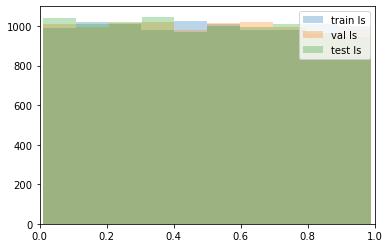

In [36]:

# what lengthscales are we generating?

ls_train_set = train_set.ls
ls_val_set =   val_set.ls
ls_test_set = test_set.ls

plt.hist(ls_train_set, alpha = 0.3, label = 'train ls') 
plt.hist(ls_val_set,   alpha = 0.3, label = 'val ls') 
plt.hist(ls_test_set,  alpha = 0.3, label = 'test ls') 
plt.xlim(0,1)
plt.legend()

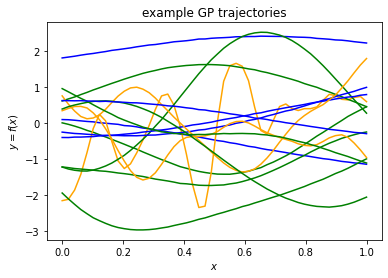

In [47]:
# what trajectories are we generating?

train_set.y.shape

fig, ax = plt.subplots()
for i in range(15):
    if train_set.ls[i] <= 0.2:
        col = 'orange'
    elif train_set.ls[i] <= 0.6:
        col = 'green'
    else:
        col = 'blue'
    ax.plot(train_set.x[i], train_set.y[i], color=col)
ax.set_xlabel('$x$')
ax.set_ylabel('$y=f(x)$')
ax.set_title('example GP trajectories')

plt.show()